In [1]:
import os
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as st

In [2]:
annualfed_path = os.path.join("resources_rates", "Fedfunds.csv")

with open(annualfed_path , newline="") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=",")

In [3]:
# read and convert Fedfunds rate data to annual 
data = pd.read_csv("resources_rates/Fedfunds.csv")
df = pd.DataFrame(data)  #I think data is already a dataframe, no need to do this
df['YEARS'] = pd.to_datetime(df['DATE']) 
df.set_index('YEARS', inplace=True)
df.index = pd.to_datetime(df.index)
df.resample('A').mean()

data_fed = df.resample('A').mean()
data_fed 

,FEDFUNDS
YEARS,
2012-12-31,0.140000
2013-12-31,0.107500
2014-12-31,0.089167
2015-12-31,0.132500
2016-12-31,0.395000
2017-12-31,1.001667
2018-12-31,1.831667
2019-12-31,2.158333
2020-12-31,0.375833


In [17]:
#JUSTIN CODE FEDFUNDS IMPORT
data = pd.read_csv("resources_rates/Fedfunds.csv")
data_fed = data
data_fed['DATE'] = pd.to_datetime(data_fed['DATE'])
data_fed = data_fed.groupby([data_fed['DATE'].dt.strftime('%Y-%m')])['FEDFUNDS'].last().reset_index()


In [13]:
data_fed

,DATE,FEDFUNDS
0,2012-01,0.08
1,2012-02,0.10
2,2012-03,0.13
3,2012-04,0.14
4,2012-05,0.16
...,...,...
126,2022-07,1.68
127,2022-08,2.33
128,2022-09,2.56
129,2022-10,3.08


In [4]:
mtg30_path = os.path.join("resources_rates", "Mtg30.csv")

with open(annualfed_path , newline="") as csvfile:

    csv_reader = csv.reader(csvfile, delimiter=",")

In [5]:
# read and convert 30Years mortgage data to annual
data = pd.read_csv("resources_rates/Mtg30.csv")
df = pd.DataFrame(data)
df['YEARS'] = pd.to_datetime(df['DATE'])
df.set_index('YEARS', inplace=True)
df.index = pd.to_datetime(df.index)
df.resample('A').mean()

data_mtg = df.resample('A').mean()
data_mtg 



,30YRS
YEARS,
2012-12-31,3.657500
2013-12-31,3.975577
2014-12-31,4.168868
2015-12-31,3.850577
2016-12-31,3.654038
2017-12-31,3.989808
2018-12-31,4.544615
2019-12-31,3.935769
2020-12-31,3.111698


In [18]:
#JUSTIN CODE MTG30 IMPORT
data = pd.read_csv("resources_rates/Mtg30.csv")
data_mtg = data
data_mtg['DATE'] = pd.to_datetime(data_mtg['DATE'])
data_mtg = data_mtg.groupby([data_mtg['DATE'].dt.strftime('%Y-%m')])['30YRS'].last().reset_index()
data_mtg

In [36]:
#merge the fed rates and 30 year mtg rate
rates_df = pd.merge(data_fed, data_mtg, on=["DATE"])

# Format to go to two decimal places, include a dollar sign, and use comma notation
#rates_df["FEDFUNDS"] = rates_df["FEDFUNDS"].astype(float).map("{:,.2f}".format)
#rates_df["30YRS"] = rates_df["30YRS"].astype(float).map("{:,.2f}".format)

rates_df["FEDFUNDS"] = rates_df["FEDFUNDS"].astype(float)
rates_df["30YRS"] = rates_df["30YRS"].astype(float)
rates_df['DATE'] = pd.to_datetime(rates_df['DATE'])

rates_df = rates_df.loc[rates_df['DATE'] >= '1/1/2018']

rates_df



,DATE,FEDFUNDS,30YRS
72,2018-01-01,1.41,4.15
73,2018-02-01,1.42,4.40
74,2018-03-01,1.51,4.44
75,2018-04-01,1.69,4.58
76,2018-05-01,1.70,4.56
77,2018-06-01,1.82,4.55
78,2018-07-01,1.91,4.54
79,2018-08-01,1.91,4.52
80,2018-09-01,1.95,4.72
81,2018-10-01,2.19,4.86


In [59]:
# # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# rate_bar = rates_df.groupby(["YEARS"]).count()["FEDFUNDS"] 


# plot_pandas = rate_bar.plot.bar(figsize=(10,5), color='y',fontsize = 14)
# rate_bar

# plt.xlabel("Years",fontsize = 8)
# plt.ylabel("Fed rate (%)",fontsize = 12)
# plt.title("Fed Rates vs Years",fontsize = 20)

# plt.tight_layout()
# plt.show()

# rate_bar

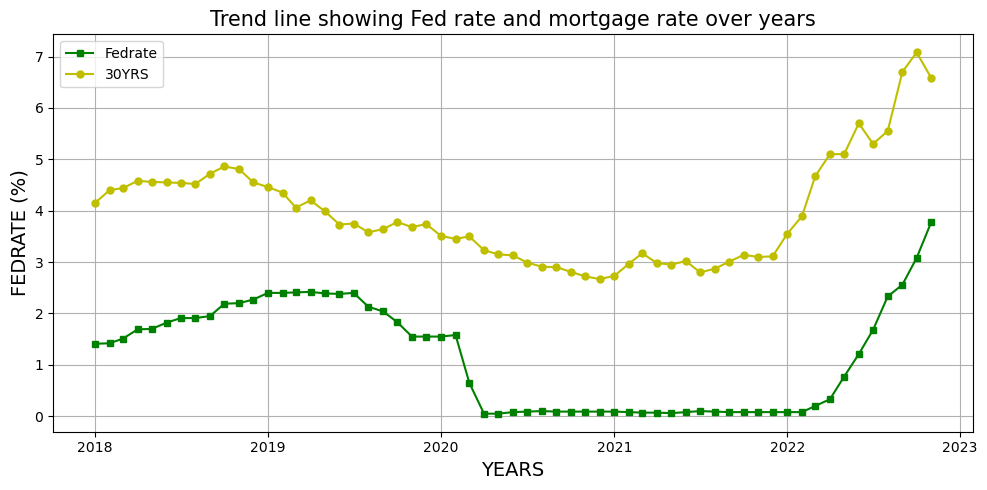

In [37]:
#JUSTIN PLOT

# # Generate a line plot
# rates_plot = rates_df.loc[rates_df["YEARS"] == "FEDFUNDS",:]
# rates_plot.head()

x1 = rates_df['DATE']
y1 = rates_df['FEDFUNDS']
y2 = rates_df['30YRS']

fig1, ax1 = plt.subplots(figsize=(10, 5))

plt.plot(x1, y1, markersize=5,marker="s",color="g", label= "Fedrate")
plt.plot(x1, y2, markersize=5,marker="o",color="y", label= "30YRS")
plt.title('Trend line showing Fed rate and mortgage rate over years',fontsize =15)
plt.xlabel('YEARS',fontsize =14)
plt.ylabel('FEDRATE (%)',fontsize =14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


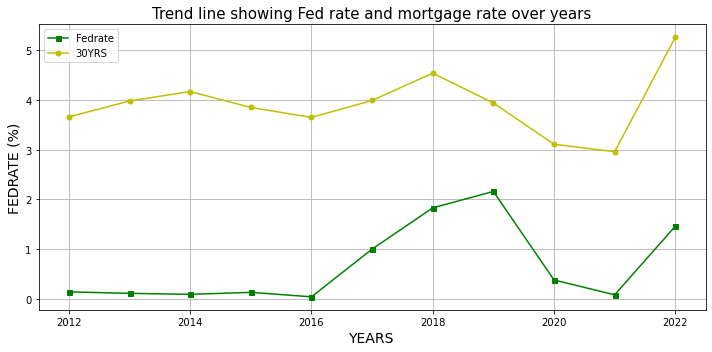

In [62]:

# # Generate a line plot
# rates_plot = rates_df.loc[rates_df["YEARS"] == "FEDFUNDS",:]
# rates_plot.head()

x1 = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
y1 = [0.14, 0.11, 0.09, 0.13, 0.04, 1.00, 1.83, 2.16, 0.38, 0.08, 1.46]
y2 = [3.66, 3.98, 4.17, 3.85, 3.65, 3.99, 4.54, 3.94, 3.11, 2.96, 5.26]

fig1, ax1 = plt.subplots(figsize=(10, 5))

plt.plot(x1, y1, markersize=5,marker="s",color="g", label= "Fedrate")
plt.plot(x1, y2, markersize=5,marker="o",color="y", label= "30YRS")
plt.title('Trend line showing Fed rate and mortgage rate over years',fontsize =15)
plt.xlabel('YEARS',fontsize =14)
plt.ylabel('FEDRATE (%)',fontsize =14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
